## This notebook contains the "answers" to the space titanic challenge. It is highly recommended you do not run this notebook directly until after you have tried the blank notebook on your own.

# Space Titanic Competition

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

<img src="images/competition_image.jpeg" width="500">

[link to competition homepage](https://www.kaggle.com/c/spaceship-titanic/overview)

### Evaluation Criteria

Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

### Submission Format

The submission format for the competition is a csv file with the following format:

>PassengerId,Transported<br>
>0013_01,False<br>
>0018_01,False<br>
>0019_01,False<br>
>0021_01,False<br>
>etc.

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

### File and Data Field Descriptions
* train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    * PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    * HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    * CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    * Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    * Destination - The planet the passenger will be debarking to.
    * Age - The age of the passenger.
    * VIP - Whether the passenger has paid for special VIP service during the voyage.
    * RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    * Name - The first and last names of the passenger.
    * Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
* test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
* sample_submission.csv - A submission file in the correct format.
    * PassengerId - Id for each passenger in the test set.
    * Transported - The target. For each passenger, predict either True or False.

### Questions before we start

* What do you think are the "easiest" features to start with?
* What engineered features can you think of?
    * What will we need to do to create these features?
* What do you *think* will be the most influential factor?
* Some of these features are numeric, others are non-numeric categorical features. What type of pre-processing do you need to do to make these features readable for our model fitting?

In [1]:
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import model_selection
from sklearn import ensemble
from sklearn import pipeline

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load the data

**Instructions:**
The first thing you need to do is load your data. syntax for pandas read_csv is below. You will need to do this for both testing and training data (two separate dataframes). Call them whatever you like, but I'll be using `df_train` and `df_test`.

`df = pd.read_csv(file)`
    
**hints**: 

Testing data are in `./data/test.csv`

Training data are in `./data/train.csv`

In [3]:
data_dir = './data'

In [4]:
test_file = os.path.join(data_dir, 'test.csv')
train_file = os.path.join(data_dir, 'train.csv')

In [5]:
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

### Fill NaN values

**Instructions:** There are multiple ways to do this. For now, let's use the *mode* of each column to fill in the NaN values.

**hints:**

This command will show you how many NaNs are in each column of a dataframe: `df.isna().sum()`

To fill the NaN values for a column named `col` inplace with the mode, use: `df[col].fillna(df[col].mode()[0], inplace=True)`

To get a list of columns, use: `df.columns.tolist()`

Remember to do this for both training and testing datasets.

In [7]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [9]:
for col in df_train.columns.tolist():
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)

In [10]:
for col in df_test.columns.tolist():
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)

### Inspect the data

**Instructions:** It's important to understand the data you are working with. Take this time to look at your data in the dataframe and using visualization. You can use either matplotlib or seaborn, but I'll give a few useful hints below.

Start by looking at these features: 'HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Age'

**hints:**

To show the first five rows of a dataframe: `df.head(5)`

To show the value counts in a column `col`: `df[col].value_counts()`

To plot the value counts as a bar plot for a column `col`: `df[col].value_counts().plot.bar()`

To plot a histogram of a column `col`: `df[col].plot.hist()`

In [12]:
df_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


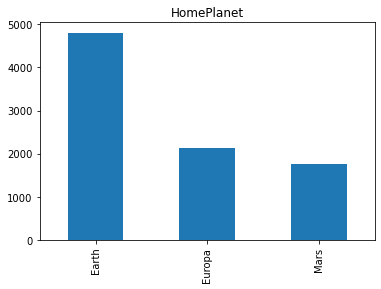

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


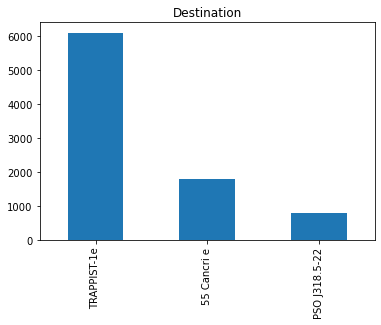

False    5656
True     3037
Name: CryoSleep, dtype: int64


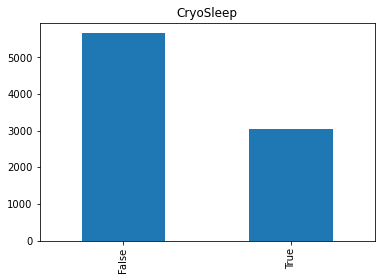

False    8494
True      199
Name: VIP, dtype: int64


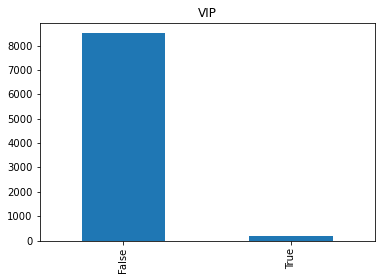

In [13]:
for col in ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']:
    print(df_train[col].value_counts())
    df_train[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

Text(0.5, 1.0, 'Age')

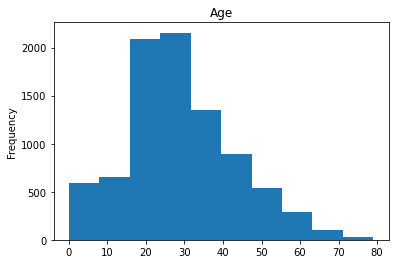

In [14]:
df_train['Age'].plot.hist()
plt.title('Age')

**Edit this cell with your observations**

Notes: Write down your observations about each of these features:
* Home Planet
* Destination
* Cryo Sleep
* VIP

**Edit this cell with your observations**

Notes: Write down your observations about age distribution.

### Function definition cells (edit these at your own risk)

In [15]:
def preprocessing_x(df_train, df_test, y, features, encoded_features):
    """ 
    Pre-process the data to prepare it for model fitting.
    
    Parameters:
        df_train: Training dataframe
        df_test: Testing dataframe
        y: Targets
        features: List of features to use
        encoded features: List of features that need to be encoded
    
    Returns:
        X_train: Training features
        X_val: Validation features
        X_test: Testing features
        y_train: Training targets
        y_val: Validation targets
    """
    
    # define X values as a subset of the dataframe
    X = df_train[features]
    X_test = df_test[features]
    
    # Use label encoder to make non-numeric features integers
    for feature in encoded_features:
        le_x = preprocessing.LabelEncoder()
        le_x.fit(X[feature])
        X.loc[:,feature] = le_x.transform(X[feature])
        X_test.loc[:,feature] = le_x.transform(X_test[feature])

    # Split into training and validation data
    X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.33)
    
    return X_train, X_val, X_test, y_train, y_val

In [16]:
def make_classification(clf, features, X_train, y_train, X_val, y_val, X_test):
    """
    Given a classifier and a set of features, fit the model.
    
    Parameters:
        clf: Classifier from sklearn
        features: List of features to use
        X_train: Training features
        y_train: Training targets
        X_val: Validation features
        y_val: Validation targets
        X_test: Testing features
        
    Returns:
        y_test_pred: Predicted test targets
    """
    
    # Fit to training data and predict for validation data
    pipe = pipeline.make_pipeline(preprocessing.StandardScaler(), clf)
    pipe.fit(X_train, y_train)
    y_val_pred = pipe.predict(X_val)
    
    # Print the accuracy score
    print(f'Accuracy: {pipe.score(X_val, y_val)}')
    
    # Make the confusion matrix and display it
    cm = metrics.confusion_matrix(y_val, y_val_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                          display_labels=pipe.classes_)
    disp.plot()
    plt.show()
    
    # Calculate feature importances, print them, and display them
    feature_importance = pipe.steps[1][1].feature_importances_.tolist()

    print('Feature importance:')
    for i in np.arange(len(feature_importance)):
        print(features[i], '\t', feature_importance[i])
    
    plt.bar(features, feature_importance)
    plt.title('Feature Importance')
    plt.xticks(rotation = 90);
    plt.show()
    
    # Try it on the test data for submission
    y_test_pred = pipe.predict(X_test)
    
    return y_test_pred

## Phase 1: Simple model with limited features

**Instructions:**
For our initial model, we'll define a set of simple features. Let's start with 'HomePlanet', 'Destination', 'CryoSleep', 'VIP', and 'Age'. Note that all of these except Age are non-numeric categorical features that need to be encoded. The target data also need to be converted to integer values (0, 1) rather than boolean values (False, True).

**hints:**
For the simple case, I'll give you the syntax. For the complex case, you'll need to do more typing.

In [17]:
# List of features
simple_features = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Age']

# List of non-numeric features
encoded_simple_features = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']

# Target column name
target_col = 'Transported'

In [18]:
# Extract the target column
df_targets = df_train[target_col]

# Convert target to integer type
y = df_targets.astype(int)

In [19]:
# Run pre-processing for the simple features list
X_train, X_val, X_test, y_train, y_val = preprocessing_x(df_train, 
                                                        df_test, y, simple_features, 
                                                        encoded_simple_features)

Accuracy: 0.716626002091321


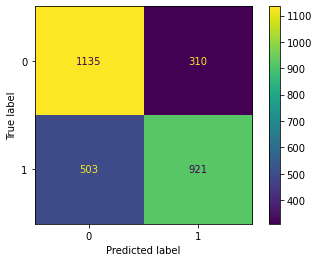

Feature importance:
HomePlanet 	 0.09172105426043337
Destination 	 0.031264371668824585
CryoSleep 	 0.46556994100315596
VIP 	 0.004317373929458734
Age 	 0.4071272591381273


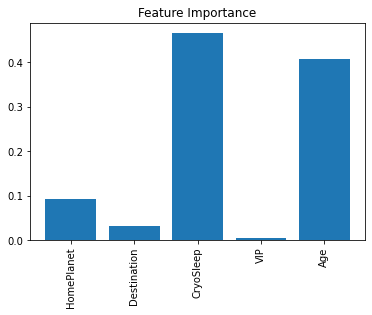

In [20]:
# Use the random forest classifier 
clf = ensemble.RandomForestClassifier()

# Run the classification
y_test_pred = make_classification(clf, simple_features, X_train, 
                                  y_train, X_val, y_val, X_test)

**Edit this cell with your observations**

Notes: Write down your observations below.
* How are we doing so far? Is this a 'good' score?
* Which are the most important features? The least important?
    * Does this surprise you?

In [21]:
y_simple_submission = pd.DataFrame({'PassengerId': df_test.PassengerId, 
                                    'Transported': y_test_pred.astype(bool)})
y_simple_submission.to_csv('./data/simple_submission.csv', index=False)

## Phase 2: Complex model with added features

**Instructions:**
For our second model, we'll define a set of expanded features.

* It's worth noting that `Cabin` actually contains three values: deck/num/side
    * Probably deck and side are more significant than num
* Perhaps the total amount spent across 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', and 'VRDeck' would be an interesting feature to include?
* If someone is traveling with a group, could it be possible that they either transport or not together?
    * Let's assume that the group is important, but the number in the group isn't

**hints:**

If you have a column that contains text that you want to split on the `/` character, the following may be helpful: `df[['col1', 'col2', 'col3']] = df[col].str.split(pat="/", expand=True)`

Similarly, if you want to split on `_`, you could use: `df[['col1', 'col2']] = df[col].str.split(pat="_", expand=True)`

In [22]:
df_train[["Deck", "Num", "Side"]] = df_train['Cabin'].str.split(pat="/", expand=True)
df_test[["Deck", "Num", "Side"]] = df_test['Cabin'].str.split(pat="/", expand=True)

In [23]:
df_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


F    2794
G    2758
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64


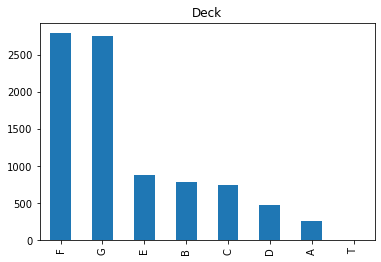

S    4487
P    4206
Name: Side, dtype: int64


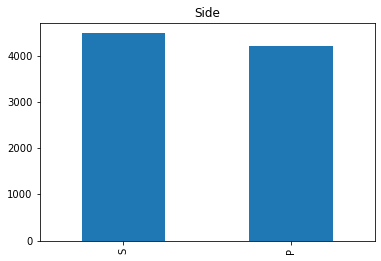

In [24]:
for col in ['Deck', 'Side']:
    print(df_train[col].value_counts())
    df_train[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

In [25]:
df_train['total_spent'] = df_train[['RoomService','FoodCourt',
                                   'ShoppingMall','Spa','VRDeck']].sum(axis=1)
df_test['total_spent'] = df_test[['RoomService','FoodCourt',
                                   'ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [26]:
df_train[['Group', 'Person_Num']] = df_train['PassengerId'].str.split(pat="_", expand=True)
df_train[['Group', 'Person_Num']] = df_train[['Group', 'Person_Num']].astype(int)

df_test[['Group', 'Person_Num']] = df_test['PassengerId'].str.split(pat="_", expand=True)
df_test[['Group', 'Person_Num']] = df_test[['Group', 'Person_Num']].astype(int)

Text(0.5, 1.0, 'Total Spent')

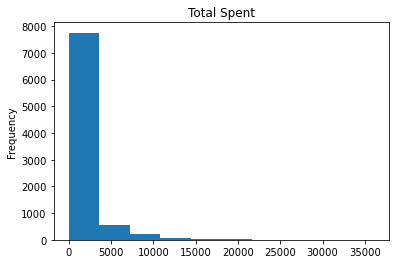

In [27]:
df_train['total_spent'].plot.hist()
plt.title('Total Spent')

In [28]:
complex_features = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Age', 
                    'Deck', 'Side','RoomService','FoodCourt',
                    'ShoppingMall','Spa','VRDeck', 'Group', 'total_spent']
encoded_complex_features = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 
                            'Deck', 'Side']

In [29]:
X_train, X_val, X_test, y_train, y_val = preprocessing_x(df_train, 
                                                        df_test, y, complex_features, 
                                                        encoded_complex_features)

Accuracy: 0.7995817357964448


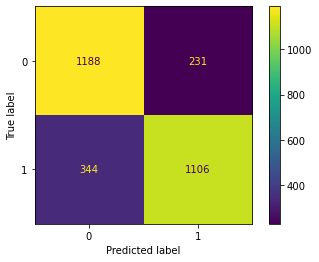

Feature importance:
HomePlanet 	 0.03118585831454597
Destination 	 0.022172829794781655
CryoSleep 	 0.06543374867728528
VIP 	 0.0021131564203293466
Age 	 0.11985894659214753
Deck 	 0.05305124188207954
Side 	 0.019251817431534715
RoomService 	 0.07045677090629783
FoodCourt 	 0.08181993060099843
ShoppingMall 	 0.06712914720201747
Spa 	 0.07657304157216735
VRDeck 	 0.08093637022495366
Group 	 0.17304074172685183
total_spent 	 0.13697639865400948


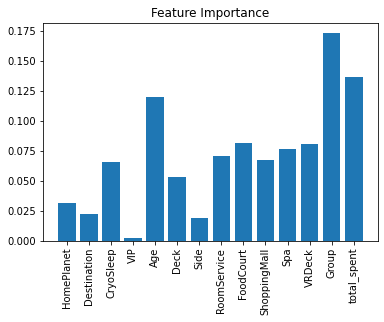

In [30]:
clf = ensemble.RandomForestClassifier()
y_test_pred = make_classification(clf, complex_features, X_train, y_train, X_val, y_val, X_test)

**Edit this cell with your observations**

Notes: Write down your observations below.
* How are we doing so far? Is this a 'better' score?
* Which are the most important features? The least important?
    * Are there any new features that are praticularly useful?

In [31]:
y_complex_submission = pd.DataFrame({'PassengerId': df_test.PassengerId, 
                                    'Transported': y_test_pred.astype(bool)})
y_complex_submission.to_csv('./data/complex_submission.csv', index=False)

### Random observation time:

Something the suprised me was that the VIP status didn't matter more, but VIPs were less likely to be transported than non-VIPs.

<AxesSubplot:>

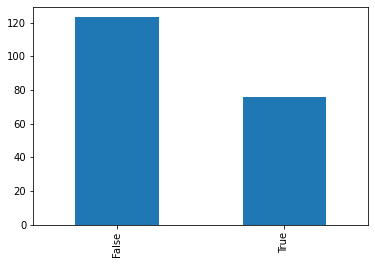

In [32]:
df_train[df_train['VIP']==True]['Transported'].value_counts().plot.bar()

<AxesSubplot:>

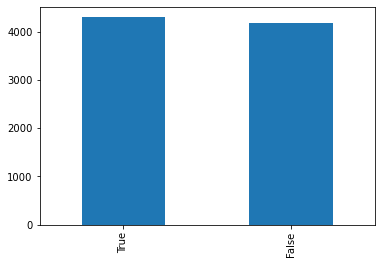

In [33]:
df_train[df_train['VIP']==False]['Transported'].value_counts().plot.bar()

## Phase 3: Optimize the hyper-parameters

Okay, so we have a decent model. But notice that we didn't do ANY hyper-parameter tuning so far. We just went with the default values.

For more about grid search, click [here](https://scikit-learn.org/stable/modules/grid_search.html)

We will be using a randomized search. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) for more details.


**I'm giving these cells to you "for free" but you can feel free to mess around with the values and such if you'd like.**

Note: credit for the following few cells goes to this article: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [35]:
clf_random = model_selection.RandomizedSearchCV(estimator = clf, 
                               param_distributions = random_grid, 
                               n_iter = 30, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)

In [36]:
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [37]:
clf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

Accuracy: 0.8030672708260718


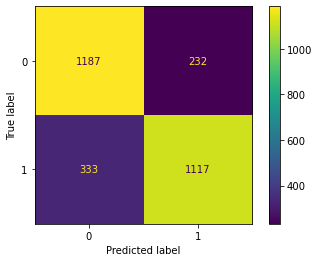

Feature importance:
HomePlanet 	 0.034327557271409466
Destination 	 0.020968952157032667
CryoSleep 	 0.0690972613427385
VIP 	 0.001924950383545147
Age 	 0.10729908835447716
Deck 	 0.053485438009221356
Side 	 0.017871519041970377
RoomService 	 0.07923618644898077
FoodCourt 	 0.0818378876263938
ShoppingMall 	 0.06387656920922723
Spa 	 0.08890636240242589
VRDeck 	 0.0850256769224103
Group 	 0.14553676155327078
total_spent 	 0.15060578927689663


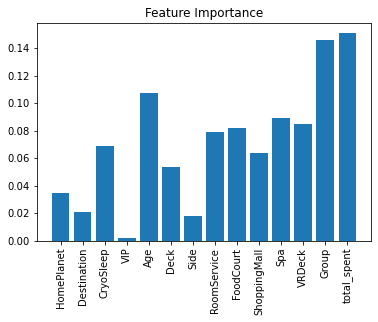

In [38]:
best_random = clf_random.best_estimator_
y_test_pred = make_classification(best_random, complex_features, 
                                  X_train, y_train, X_val, y_val, X_test)

In [39]:
y_best_submission = pd.DataFrame({'PassengerId': df_test.PassengerId, 
                                    'Transported': y_test_pred.astype(bool)})
y_best_submission.to_csv('./data/best_submission.csv', index=False)

**Edit this cell with your observations**

Notes: Write down your observations below.
* How did we do? Is this the 'best' score?
* Did tuning improve the score?
* Would tuning matter more or less in other models?
* Take a look at the [leaderboard](https://www.kaggle.com/c/spaceship-titanic/leaderboard#)

## Phase 4: Freeform time

Want to play aorund with some other models? Retune parameters? Add more features? Here's your chance to try to improve. Work alone or ask you neighbor for help. Maybe form a team on kaggle and create your own submission!